<a href="https://colab.research.google.com/github/arielnbg/Projeto-de-Pesquisa/blob/hybrid/Hybrid_Sample_e_Grid_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from xlrd import sheet
import requests
import json
import pandas as pd
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

drive.mount('/content/drive')
caminho_arquivo = '/content/drive/MyDrive/IC/Base_SINASC_2018-2021_colunas_removidas.csv'
DataFrame = pd.read_csv(caminho_arquivo, sep = ',', header = 0)
#importando a base

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
atributos_selecionados_literatura = ['IDADEMAE',
                                     'ESTCIVMAE',
                                     'CODOCUPMAE',
                                     'QTDFILVIVO',
                                     'QTDFILMORT',
                                     'GRAVIDEZ',
                                     'SEXO',
                                     'PESO',
                                     'RACACORMAE',
                                     'QTDPARTCES',
                                     'ESCMAEAGR1']
DataFrame_lit = DataFrame[atributos_selecionados_literatura].copy()
DataFrame_lit.columns

# Separei as colunas de atriutos que eu irei usar no dataset
# Filtrei a base de acordo com atributos selecionados

Index(['IDADEMAE', 'ESTCIVMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT',
       'GRAVIDEZ', 'SEXO', 'PESO', 'RACACORMAE', 'QTDPARTCES', 'ESCMAEAGR1'],
      dtype='object')

In [ ]:
ignorado = 9.0

#Drop dos valores que são outliers no preenchimento da coluna IDADEMAE = Idade da mãe.
DataFrame_lit = DataFrame_lit[(DataFrame_lit['IDADEMAE'] < 54)]

#Drop dos valores que são outliers no preenchimento da coluna QTDFILVIVO = Número de filhos vivos.
DataFrame_lit = DataFrame_lit[(DataFrame_lit['QTDFILVIVO'] < 12)]

#Drop dos valores que são outliers no preenchimento da coluna QTDFILMORT = Número de filhos mortos.
DataFrame_lit = DataFrame_lit[(DataFrame_lit['QTDFILMORT'] < 8)]

#Drop dos valores que são outliers no preenchimento da coluna QTDPARTCES = Quantidade de filhos cesáreo.
DataFrame_lit = DataFrame_lit[(DataFrame_lit['QTDPARTCES']<6)]

In [ ]:
#Alteração do atributo 'CODOCUPMAE' numerico para categoria, resalta-se que o código que representava a ocupação que possui-se mais de 2000 registro foi
# codificado para um número. Entretanto, todo código que possui-se menos de 2000 registro deveria ser categorizado em outros tipos de ocupação!

DataFrame_lit.loc[DataFrame_lit['CODOCUPMAE'] == 999992.0, 'CODOCUPMAE'] = 0                # O código 999992.0 representa a profissão de acordo com o CBO de "DONA DE CASA" RECEBE VALOR 0
DataFrame_lit.loc[DataFrame_lit['CODOCUPMAE'] == 621005.0, 'CODOCUPMAE'] = 1                # O código 621005.0 representa a profissão de acordo com o CBO de "TRABALHADOR AGROPECUARIO EM GERAL" RECEBE VALOR 1
DataFrame_lit.loc[DataFrame_lit['CODOCUPMAE'] == 622020.0, 'CODOCUPMAE'] = 1                # O código 622020.0 representa a profissão de acordo com o CBO de "TRABALHADOR VOLANTE DA AGRICULTURA" RECEBE VALOR 1
DataFrame_lit.loc[DataFrame_lit['CODOCUPMAE'] == 999991.0, 'CODOCUPMAE'] = 2                # O código 999991.0 representa a profissão de acordo com o CBO de "ESTUDANTE" RECEBE VALOR 2
DataFrame_lit.loc[DataFrame_lit['CODOCUPMAE'] == 622005.0, 'CODOCUPMAE'] = 1                # O código 622005.0 representa a profissão de acordo com o CBO de "CASEIRO (AGRICULTURA)" RECEBE VALOR 1
DataFrame_lit.loc[DataFrame_lit['CODOCUPMAE'] == 354705.0, 'CODOCUPMAE'] = 3                # O código 354705.0 representa a profissão de acordo com o CBO de "REPRESENTANTE COMERCIAL AUTONOMO" RECEBE VALOR 3
DataFrame_lit.loc[DataFrame_lit['CODOCUPMAE'] == 611005.0, 'CODOCUPMAE'] = 1                # O código 611005.0 representa a profissão de acordo com o CBO de "PRODUTOR AGROPECUARIO, EM GERAL" RECEBE VALOR 1

DataFrame_lit.loc[DataFrame_lit['CODOCUPMAE'] == 521110.0, 'CODOCUPMAE'] = 3                # O código 521110.0 representa a profissão de acordo com o CBO de "VENDEDOR DE COMERCIO VAREJISTA" RECEBE VALOR 3
DataFrame_lit.loc[DataFrame_lit['CODOCUPMAE'] == 411010.0, 'CODOCUPMAE'] = 4                # O código 411010.0 representa a profissão de acordo com o CBO de "ASSISTENTE ADMINISTRATIVO" RECEBE VALOR 4
DataFrame_lit.loc[DataFrame_lit['CODOCUPMAE'] == 421125.0, 'CODOCUPMAE'] = 5                # O código 421125.0 representa a profissão de acordo com o CBO de "OPERADOR DE CAIXA" RECEBE VALOR 5
DataFrame_lit.loc[DataFrame_lit['CODOCUPMAE'] == 763010.0, 'CODOCUPMAE'] = 6                # O código 763010.0 representa a profissão de acordo com o CBO de "COSTUREIRA DE PECAS SOB ENCOMENDA" RECEBE VALOR 6
DataFrame_lit.loc[DataFrame_lit['CODOCUPMAE'] == 231205.0, 'CODOCUPMAE'] = 7                # O código 231205.0 representa a profissão de acordo com o CBO de "PROFESSOR DA EDUCACAO DE JOVENS E ADULTOS DO ENSINO
                                                                                                                                                  #FUNDAMENTAL (PRIMEIRA A QUARTA SERIE)" RECEBE VALOR 7
DataFrame_lit.loc[DataFrame_lit['CODOCUPMAE'] == 512105.0, 'CODOCUPMAE'] = 8                # O código 512105.0 representa a profissão de acordo com o CBO de "EMPREGADO DOMESTICO NOS SERVICOS GERAIS" RECEBE VALOR 8
DataFrame_lit.loc[DataFrame_lit['CODOCUPMAE'] == 516110.0, 'CODOCUPMAE'] = 9                # O código 516110.0 representa a profissão de acordo com o CBO de "CABELEIREIRO" RECEBE VALOR 9
DataFrame_lit.loc[DataFrame_lit['CODOCUPMAE'] == 422105.0, 'CODOCUPMAE'] = 10               # O código 422105.0 representa a profissão de acordo com o CBO de "RECEPCIONISTA, EM GERAL" RECEBE VALOR 10
DataFrame_lit.loc[DataFrame_lit['CODOCUPMAE'] == 223505.0, 'CODOCUPMAE'] = 11               # O código 223505.0 representa a profissão de acordo com o CBO de "ENFERMEIRO" RECEBE VALOR 11
DataFrame_lit.loc[DataFrame_lit['CODOCUPMAE'] == 322205.0, 'CODOCUPMAE'] = 11               # O código 322205.0 representa a profissão de acordo com o CBO de "Técnico de enfermagem" RECEBE VALOR 11
DataFrame_lit.loc[DataFrame_lit['CODOCUPMAE'] == 612005.0, 'CODOCUPMAE'] = 1               # O código 612005.0 representa a profissão de acordo com o CBO de "Agricultor familiar polivalente" RECEBE VALOR 1
DataFrame_lit.loc[DataFrame_lit['CODOCUPMAE'] == 252105.0, 'CODOCUPMAE'] = 4               # O código 252105.0 representa a profissão de acordo com o CBO de "Analista administrativo" RECEBE VALOR 4
DataFrame_lit.loc[DataFrame_lit['CODOCUPMAE'] == 516120.0, 'CODOCUPMAE'] = 12               # O código 516120.0 representa a profissão de acordo com o CBO de "Manicure" RECEBE VALOR 12
DataFrame_lit.loc[DataFrame_lit['CODOCUPMAE'] == 141410.0, 'CODOCUPMAE'] = 13              # O código 141410.0 representa a profissão de acordo com o CBO de "dono de comércio varejista" RECEBE VALOR 13
DataFrame_lit.loc[DataFrame_lit['CODOCUPMAE'] == 512120.0, 'CODOCUPMAE'] = 8               # O código 512120.0 representa a profissão de acordo com o CBO de "Empregado doméstico diarista" RECEBE VALOR 8
DataFrame_lit.loc[DataFrame_lit['CODOCUPMAE'] == 521130.0, 'CODOCUPMAE'] = 14              # O código 521130.0 representa a profissão de acordo com o CBO de "Atendente de farmácia - balconista" RECEBE VALOR 14
DataFrame_lit.loc[DataFrame_lit['CODOCUPMAE'] == 241005.0, 'CODOCUPMAE'] = 15               # O código 241005.0 representa a profissão de acordo com o CBO de "Advogada" RECEBE VALOR 15
DataFrame_lit.loc[(DataFrame_lit['CODOCUPMAE']>=10205.0) & (DataFrame_lit['CODOCUPMAE']<=999994.0), 'CODOCUPMAE'] = 16 # todo código que possui-se menos de 2000 registro deveria ser categorizado em outros tipos de ocupação RECEBE VALOR 20

In [ ]:
#Filtra a coluna PESO do DataFrame_lit com a condição que tenha valores iguais ou superiores a 2500
DataFrame_lit_separado = DataFrame_lit.loc[DataFrame_lit['PESO'] >= 2500]
DataFrame_lit_separado.shape

(480324, 11)

In [ ]:
#Alteração do atributo 'PESO' float para numerico. Sobrescrevendo(categorização).
#Este código binariza os valores da coluna PESO no DataFrame DataFrame_lit_separado e conta os valores únicos na coluna PESO após a binarização.
#Sendo 1 a Classe Minoritária e 0 a Classe Majoritária.
DataFrame_lit_separado.loc[DataFrame_lit_separado['PESO'] < 4000.0, 'PESO'] = 0 #localiza as linhas no DataFrame onde o valor da coluna PESO é menor do que 4000.0 e define o valor dessas linhas na coluna PESO como 0.
DataFrame_lit_separado.loc[DataFrame_lit_separado['PESO'] >= 4000.0, 'PESO'] = 1 #localiza as linhas no DataFrame onde o valor da coluna PESO é igual ou maior do que 4000.0 e define o valor dessas linhas na coluna PESO como 1.
DataFrame_lit_separado['PESO'].value_counts()

PESO
0.0    448389
1.0     31935
Name: count, dtype: int64

In [ ]:
DataFrame_lit_separado.dropna(inplace=True)

# Verifique se os nulos foram removidos
DataFrame_lit_separado.isna().sum()

<ipython-input-32-0a61453723f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataFrame_lit_separado.dropna(inplace=True)


IDADEMAE      0
ESTCIVMAE     0
CODOCUPMAE    0
QTDFILVIVO    0
QTDFILMORT    0
GRAVIDEZ      0
SEXO          0
PESO          0
RACACORMAE    0
QTDPARTCES    0
ESCMAEAGR1    0
dtype: int64

In [ ]:
DataFrame_lit_separado['PESO'].value_counts()

PESO
0.0    424121
1.0     30261
Name: count, dtype: int64

In [ ]:
PesoNormal = DataFrame_lit_separado.loc[DataFrame_lit_separado["PESO"] == 0] #Onde o valor da coluna PESO é igual a 0 e cria um novo DataFrame chamado PesoNormal contendo essas linhas.
MACRO = DataFrame_lit_separado.loc[DataFrame_lit_separado["PESO"] == 1] #Onde o valor da coluna PESO é igual a 1 e cria um novo DataFrame chamado MACRO contendo essas linhas.

In [ ]:
MACRO['PESO'].value_counts()

PESO
1.0    30261
Name: count, dtype: int64

In [ ]:
MACRO_teste = MACRO[MACRO['PESO'] == 1].sample(n=9078, random_state=42)
PesoNormal_teste = PesoNormal[PesoNormal['PESO'] == 0].sample(n=9078, random_state=42)

df_teste = pd.concat([MACRO_teste, PesoNormal_teste], ignore_index=True)
#df_teste = pd.concat([df_balanceado_1, df_balanceado_0])

# Exibir informações sobre o DataFrame
print(df_teste['PESO'].value_counts())
print(df_teste.head())

PESO
1.0    9078
0.0    9078
Name: count, dtype: int64
   IDADEMAE  ESTCIVMAE  CODOCUPMAE  QTDFILVIVO  QTDFILMORT  GRAVIDEZ  SEXO  \
0        41        2.0        16.0         1.0         0.0       1.0     2   
1        33        5.0         8.0         4.0         0.0       1.0     1   
2        18        1.0         1.0         0.0         1.0       1.0     1   
3        20        1.0         3.0         1.0         0.0       1.0     2   
4        23        1.0        16.0         0.0         0.0       1.0     1   

   PESO  RACACORMAE  QTDPARTCES  ESCMAEAGR1  
0   1.0         1.0         1.0         8.0  
1   1.0         4.0         0.0        12.0  
2   1.0         4.0         0.0         4.0  
3   1.0         4.0         1.0        12.0  
4   1.0         4.0         0.0         6.0  


In [ ]:
# Obter os índices das instâncias selecionadas
indices_macro_teste = MACRO_teste.index
indices_pesonormal_teste = PesoNormal_teste.index

# Excluir as instâncias dos DataFrames originais
MACRO = MACRO.drop(indices_macro_teste)
PesoNormal = PesoNormal.drop(indices_pesonormal_teste)

# Exibir informações sobre o tamanho dos DataFrames originais após a exclusão
print("Tamanho de MACRO após exclusão:", len(MACRO))
print("Tamanho de PesoNormal após exclusão:", len(PesoNormal))

Tamanho de MACRO após exclusão: 21183
Tamanho de PesoNormal após exclusão: 415043


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

# Concatenar os conjuntos de dados MACRO e PesoNormal
df_treino = pd.concat([MACRO, PesoNormal], ignore_index=True)

# Exibir informações sobre o DataFrame de treinamento antes do undersample
print("Antes do Random Under-sampling:")
print(df_treino['PESO'].value_counts())

# Separar features (X) e target (y)
X = df_treino.drop(columns=['PESO'])
y = df_treino['PESO']

# Aplicar Random Under-sampling
rus = RandomUnderSampler(sampling_strategy=0.6, random_state=42) #sampling_strategy=0.6: Define a proporção de instâncias a serem mantidas da classe majoritária. Neste caso, 60% das instâncias serão mantidas.
X_resampled, y_resampled = rus.fit_resample(X, y)

# Criar DataFrame de treinamento após o undersample
df_treino_under = pd.DataFrame(X_resampled, columns=X.columns)
df_treino_under['PESO'] = y_resampled

# Exibir informações sobre o DataFrame de treinamento após o undersample
print("\nDepois do Random Under-sampling:")
print(df_treino_under['PESO'].value_counts())
print(df_treino_under)

Antes do Random Under-sampling:
PESO
0.0    415043
1.0     21183
Name: count, dtype: int64

Depois do Random Under-sampling:
PESO
0.0    35305
1.0    21183
Name: count, dtype: int64
       IDADEMAE  ESTCIVMAE  CODOCUPMAE  QTDFILVIVO  QTDFILMORT  GRAVIDEZ  \
0            38        2.0        16.0         0.0         0.0       1.0   
1            35        1.0        16.0         1.0         0.0       1.0   
2            33        1.0        16.0         2.0         2.0       1.0   
3            20        1.0         0.0         0.0         0.0       1.0   
4            23        5.0        16.0         0.0         0.0       1.0   
...         ...        ...         ...         ...         ...       ...   
56483        16        5.0         0.0         0.0         0.0       1.0   
56484        20        2.0        13.0         1.0         0.0       1.0   
56485        21        1.0         0.0         0.0         0.0       1.0   
56486        27        5.0         0.0         2.0        

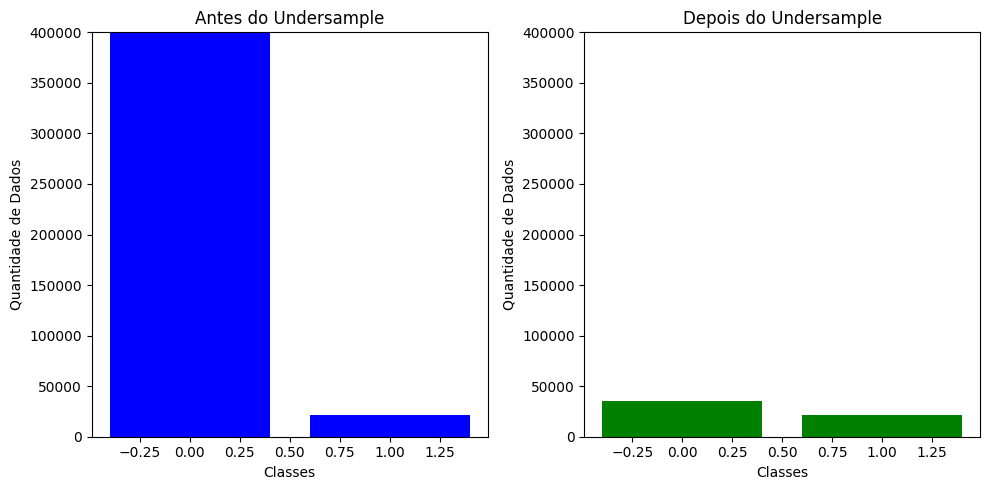

In [ ]:
import matplotlib.pyplot as plt

# Dados antes do undersample
antes_undersample = df_treino['PESO'].value_counts()

# Dados depois do undersample
depois_undersample = df_treino_under['PESO'].value_counts()

# Configurações do gráfico
plt.figure(figsize=(10, 5))

# Gráfico antes do undersample
plt.subplot(1, 2, 1)
plt.bar(antes_undersample.index, antes_undersample.values, color='blue')
plt.title('Antes do Undersample')
plt.xlabel('Classes')
plt.ylabel('Quantidade de Dados')
plt.ylim(0, 400000)  # Definindo limite do eixo y

# Gráfico depois do undersample
plt.subplot(1, 2, 2)
plt.bar(depois_undersample.index, depois_undersample.values, color='green')
plt.title('Depois do Undersample')
plt.xlabel('Classes')
plt.ylabel('Quantidade de Dados')
plt.ylim(0, 400000)  # Definindo limite do eixo y

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Supondo que já temos o X e y definidos
X = df_treino_under.drop(columns=['PESO'])
y = df_treino_under['PESO']

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Criar DataFrame de treinamento após o SMOTE
df_treino_smote = pd.DataFrame(X_resampled, columns=X.columns)
df_treino_smote['PESO'] = y_resampled

# Exibir informações sobre o DataFrame de treinamento após o SMOTE
print("Após o SMOTE:")
print(df_treino_smote['PESO'].value_counts())
print(df_treino_smote.head())

# Criar DataFrame apenas com os dados sintéticos gerados pelo SMOTE
df_sinteticos = df_treino_smote[df_treino_smote['PESO'] != y.iloc[1]]  # Assumindo que 1 é a classe minoritária
print("\nDataFrame apenas com os dados sintéticos gerados pelo SMOTE:")
print(df_sinteticos.head())

Após o SMOTE:
PESO
0.0    35305
1.0    35305
Name: count, dtype: int64
   IDADEMAE  ESTCIVMAE  CODOCUPMAE  QTDFILVIVO  QTDFILMORT  GRAVIDEZ  SEXO  \
0        38        2.0        16.0         0.0         0.0       1.0     2   
1        35        1.0        16.0         1.0         0.0       1.0     2   
2        33        1.0        16.0         2.0         2.0       1.0     2   
3        20        1.0         0.0         0.0         0.0       1.0     2   
4        23        5.0        16.0         0.0         0.0       1.0     2   

   RACACORMAE  QTDPARTCES  ESCMAEAGR1  PESO  
0         4.0         0.0         8.0   0.0  
1         4.0         1.0         6.0   0.0  
2         4.0         1.0         6.0   0.0  
3         4.0         0.0         5.0   0.0  
4         4.0         0.0         6.0   0.0  

DataFrame apenas com os dados sintéticos gerados pelo SMOTE:
       IDADEMAE  ESTCIVMAE  CODOCUPMAE  QTDFILVIVO  QTDFILMORT  GRAVIDEZ  \
35305        31        5.0         1.0        

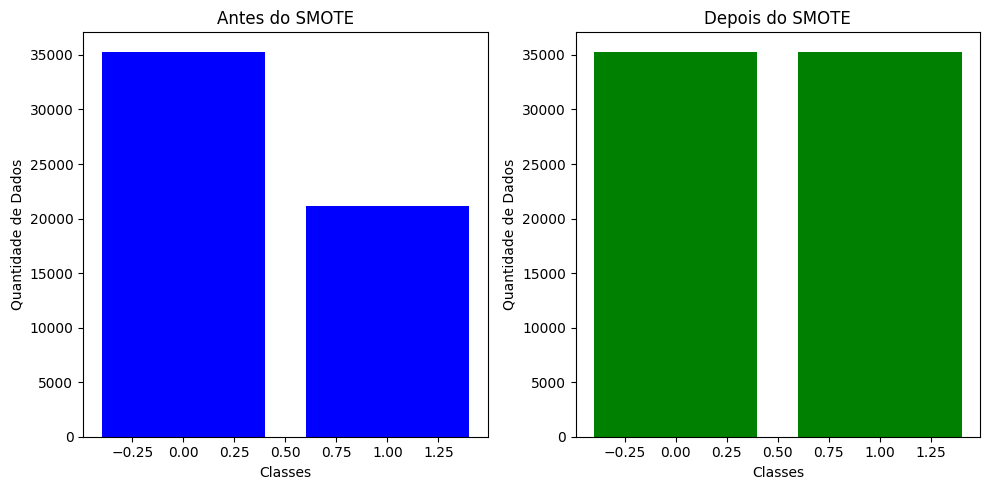

In [ ]:
import matplotlib.pyplot as plt

# Dados antes do SMOTE
antes_smote = df_treino_under['PESO'].value_counts()

# Dados depois do SMOTE
depois_smote = df_treino_smote['PESO'].value_counts()

# Configurações do gráfico
plt.figure(figsize=(10, 5))

# Gráfico antes do SMOTE
plt.subplot(1, 2, 1)
plt.bar(antes_smote.index, antes_smote.values, color='blue')
plt.title('Antes do SMOTE')
plt.xlabel('Classes')
plt.ylabel('Quantidade de Dados')

# Gráfico depois do SMOTE
plt.subplot(1, 2, 2)
plt.bar(depois_smote.index, depois_smote.values, color='green')
plt.title('Depois do SMOTE')
plt.xlabel('Classes')
plt.ylabel('Quantidade de Dados')

plt.tight_layout()
plt.show()


#DecisionTree

Especificidade: 0.6872659176029963

Relatório de Classificação do Conjunto de Teste para Decison Tree:
              precision    recall  f1-score   support

         0.0     0.5257    0.6873    0.5957      9078
         1.0     0.5484    0.3798    0.4488      9078

    accuracy                         0.5335     18156
   macro avg     0.5370    0.5335    0.5223     18156
weighted avg     0.5370    0.5335    0.5223     18156



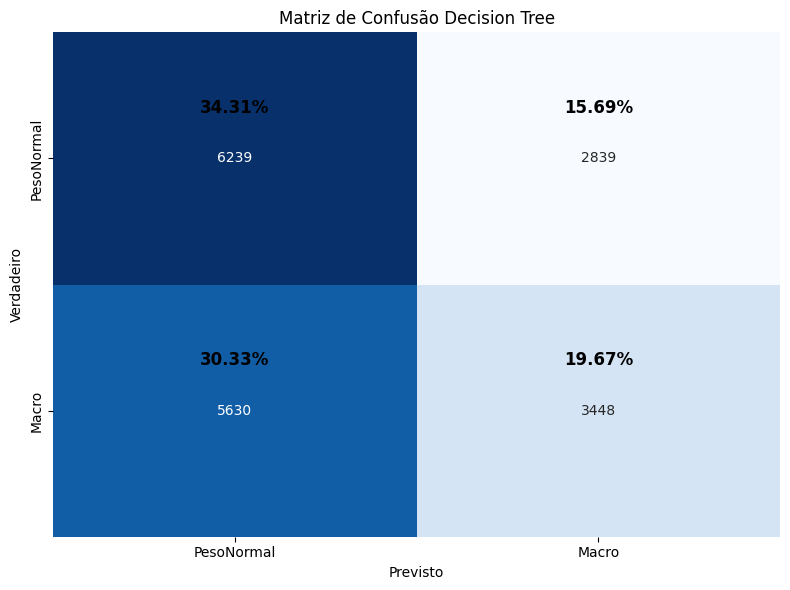

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV
import seaborn as sns

# Separar features e target para treinamento
X_treino = df_treino_smote.drop(columns=['PESO'])
y_treino = df_treino_smote['PESO']

# Separar features e target para teste
X_teste = df_teste.drop(columns=['PESO'])
y_teste = df_teste['PESO']

# Inicializar e treinar o Decision Tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_treino, y_treino)

# Prever os rótulos para os dados de teste
y_pred_teste = clf.predict(X_teste)

# Calcular a matriz de confusão para os dados de teste
conf_matrix_teste = confusion_matrix(y_teste, y_pred_teste)
tn_teste, fp_teste, fn_teste, tp_teste = conf_matrix_teste.ravel()

# Função para calcular a especificidade
def calcular_especificidade(verdadeiros_negativos, falsos_positivos):
    if verdadeiros_negativos + falsos_positivos == 0:
        return 0  # Evita divisão por zero
    especificidade = verdadeiros_negativos / (verdadeiros_negativos + falsos_positivos)
    return especificidade

# Calcular a especificidade usando os valores da matriz de confusão
especificidade = calcular_especificidade(tn_teste, fp_teste)
print("Especificidade:", especificidade)


# Plotar a matriz de confusão do conjunto de teste
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_teste, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['PesoNormal', 'Macro'], yticklabels=['PesoNormal', 'Macro'])
# Adicionando as porcentagens abaixo dos valores
for i in range(conf_matrix_teste.shape[0]):
    for j in range(conf_matrix_teste.shape[1]):
        plt.text(j+0.5, i+0.3, "{:.2f}%".format(conf_matrix_rf[i, j] / np.sum(conf_matrix_rf) * 100),
                     ha='center', va='center', color='black', fontsize=12, fontweight='bold')


plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão Decision Tree')
plt.tight_layout()
print("\nRelatório de Classificação do Conjunto de Teste para Decison Tree:")
print(classification_report(y_teste, y_pred_teste, digits=4))

plt.show()

In [ ]:
parametros = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'min_samples_split': [2, 5, 10, 30, 60, 90, 120],
              'min_samples_leaf': [0.5, 1, 2, 4, 6, 8],
              'min_weight_fraction_leaf': [0.0, 0.5]}

In [ ]:
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parametros)
grid_search.fit(X_teste, y_pred_teste)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'splitter': 'random'}
0.7366176081636713


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Defina os melhores parâmetros obtidos pelo GridSearch
best_params_dt = {'criterion': 'entropy',
                  'min_samples_leaf': 1,
                  'min_samples_split': 2,
                  'min_weight_fraction_leaf': 0.0,
                  'splitter': 'random'}

# Inicialize o DecisionTreeClassifier com os melhores parâmetros
best_dt_model = DecisionTreeClassifier(**best_params_dt)

# Treine o modelo com os melhores parâmetros
best_dt_model.fit(X_treino, y_treino)

DecisionTreeClassifier(criterion='entropy', splitter='random')

Acurácia do modelo DecisionTree: 0.5313945803040317
Especificidade: 0.6841815377836528
              precision    recall  f1-score   support

         0.0     0.5240    0.6842    0.5935      9078
         1.0     0.5452    0.3786    0.4469      9078

    accuracy                         0.5314     18156
   macro avg     0.5346    0.5314    0.5202     18156
weighted avg     0.5346    0.5314    0.5202     18156



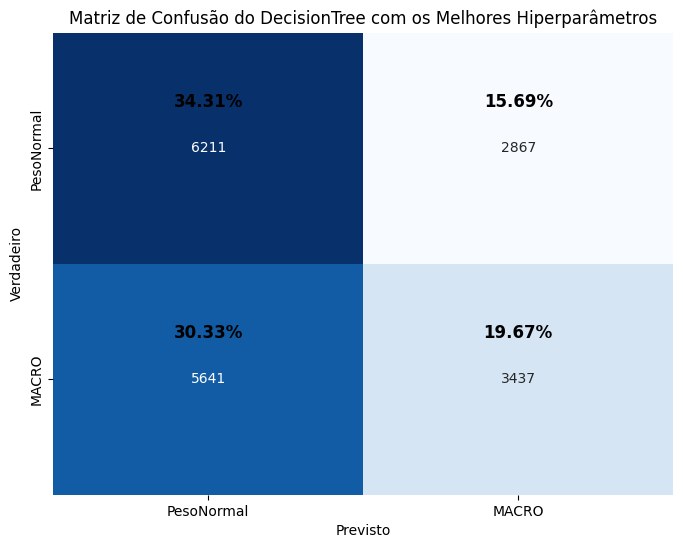

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Função para calcular a especificidade
def calcular_especificidade(verdadeiros_negativos, falsos_positivos):
    if verdadeiros_negativos + falsos_positivos == 0:
        return 0  # Evita divisão por zero
    especificidade = verdadeiros_negativos / (verdadeiros_negativos + falsos_positivos)
    return especificidade

# Avaliar a acurácia do modelo
accuracy_dt = best_dt_model.score(X_teste, y_teste)
print("Acurácia do modelo DecisionTree:", accuracy_dt)

# Fazer previsões no conjunto de teste
y_pred = best_dt_model.predict(X_teste)

# Calcular a matriz de confusão para os dados de teste
conf_matrix_teste = confusion_matrix(y_teste, y_pred)
tn_teste, fp_teste, fn_teste, tp_teste = conf_matrix_teste.ravel()

# Calcular a especificidade usando os valores da matriz de confusão
especificidade = calcular_especificidade(tn_teste, fp_teste)
print("Especificidade:", especificidade)


# Imprimir o relatório de classificação
print(classification_report(y_teste, y_pred, digits=4))

# Função para plotar matriz de confusão
def plot_confusion_matrix(model, X, y):
    # Faça previsões
    y_pred = model.predict(X)
    # Crie a matriz de confusão
    cm = confusion_matrix(y, y_pred)
    # Plot
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['PesoNormal', 'MACRO'], yticklabels=['PesoNormal', 'MACRO'])

    # Adicionando as porcentagens abaixo dos valores
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j+0.5, i+0.3, "{:.2f}%".format(conf_matrix_rf[i, j] / np.sum(conf_matrix_rf) * 100),
                     ha='center', va='center', color='black', fontsize=12, fontweight='bold')

    # Labels da matriz
    plt.xlabel('Previsto')
    plt.ylabel('Verdadeiro')
    plt.title('Matriz de Confusão do DecisionTree com os Melhores Hiperparâmetros')
    plt.show()

# Plotar matriz de confusão para o DecisionTree
plot_confusion_matrix(best_dt_model, X_teste, y_teste)

# RadomForest

Especificidade: 0.6862745098039216

Relatório de Classificação do Conjunto de Teste para Random Forest:
              precision    recall  f1-score   support

         0.0     0.5308    0.6863    0.5986      9078
         1.0     0.5564    0.3935    0.4610      9078

    accuracy                         0.5399     18156
   macro avg     0.5436    0.5399    0.5298     18156
weighted avg     0.5436    0.5399    0.5298     18156



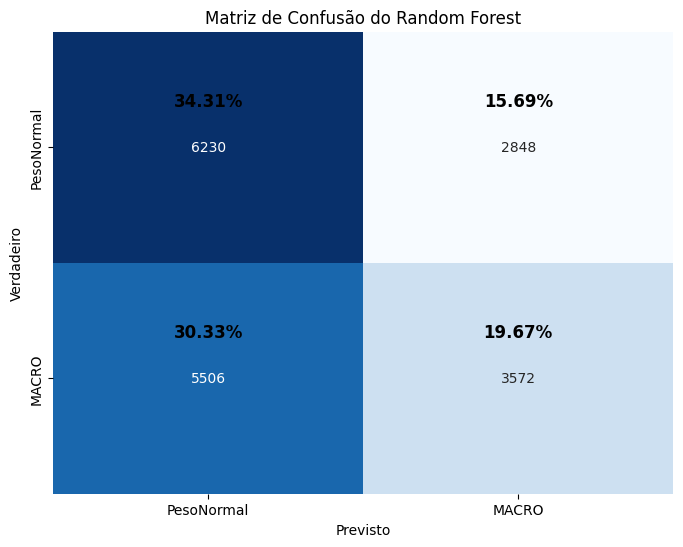

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Inicializar e treinar o classificador Random Forest
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_treino, y_treino)

# Prever os rótulos para os dados de teste
y_pred_rf = rf_clf.predict(X_teste)

# Calcular métricas de avaliação do conjunto de teste
accuracy_rf = accuracy_score(y_teste, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_teste, y_pred_rf)
tn_rf, fp_rf, fn_rf, tp_rf = conf_matrix_rf.ravel()

# Calcular a especificidade usando os valores da matriz de confusão
especificidade = calcular_especificidade(tn_rf, fp_rf)
print("Especificidade:", especificidade)

# Plotar a matriz de confusão do conjunto de teste para Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['PesoNormal', 'MACRO'], yticklabels=['PesoNormal', 'MACRO'])
# Adicionando as porcentagens abaixo dos valores
for i in range(conf_matrix_rf.shape[0]):
    for j in range(conf_matrix_rf.shape[1]):
        plt.text(j+0.5, i+0.3, "{:.2f}%".format(conf_matrix_rf[i, j] / np.sum(conf_matrix_rf) * 100),
                     ha='center', va='center', color='black', fontsize=12, fontweight='bold')
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão do Random Forest')


# Exibir relatório de classificação do conjunto de teste para Random Forest
print("\nRelatório de Classificação do Conjunto de Teste para Random Forest:")
print(classification_report(y_teste, y_pred_rf, digits=4))

plt.show()

In [ ]:
parametros = {'n_estimators': [30, 50, 100, 150],
              'criterion': ['gini', 'entropy'],
              'min_samples_split': [2, 5, 10],
              'max_features': ['sqrt', 'log2'],
              'min_samples_leaf': [1, 2, 3],
              'max_leaf_nodes': [None,10, 20]}

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parametros)
grid_search.fit(X_teste, y_pred_rf)

melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_

print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'gini', 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
0.8098716904239922


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Defina os melhores parâmetros obtidos pelo GridSearch
'''best_params_rf = {'criterion': 'entropy',
                  'max_features': 'sqrt',
                  'max_leaf_nodes': None,
                  'min_samples_leaf': 1,
                  'min_samples_split': 2,
                  'n_estimators': 100}'''

best_params_rf = {'criterion': 'gini',
                  'max_features': 'log2',
                  'max_leaf_nodes': None,
                  'min_samples_leaf': 1,
                  'min_samples_split': 2,
                  'n_estimators': 100}

# Inicialize o RandomForestClassifier com os melhores parâmetros
best_rf_model = RandomForestClassifier(**best_params_rf)

# Treine o modelo com os melhores parâmetros
best_rf_model.fit(X_treino, y_treino)

RandomForestClassifier(max_features='log2')

Acurácia do modelo RandomForest com os melhores hiperparâmetros: 0.5410883454505397
              precision    recall  f1-score   support

         0.0     0.5318    0.6878    0.5998      9078
         1.0     0.5582    0.3944    0.4622      9078

    accuracy                         0.5411     18156
   macro avg     0.5450    0.5411    0.5310     18156
weighted avg     0.5450    0.5411    0.5310     18156

Especificidade do Random Forest: 0.6862745098039216


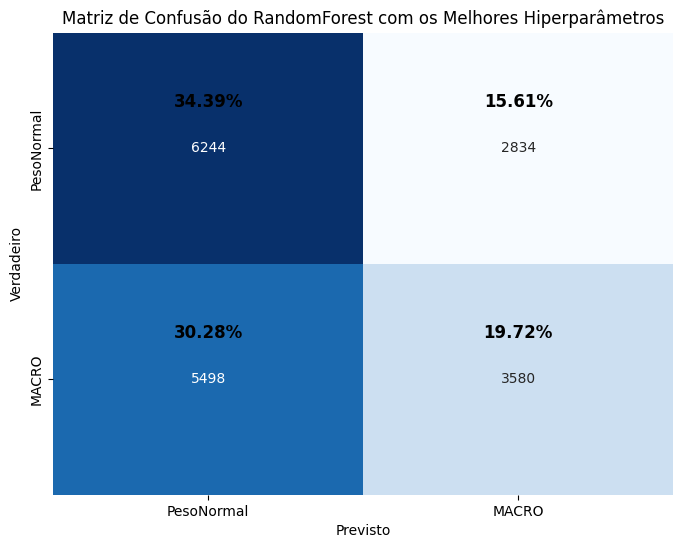

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calcule a acurácia do modelo RandomForest com os melhores hiperparâmetros
accuracy_rf = best_rf_model.score(X_teste, y_teste)

# Imprima a acurácia
print("Acurácia do modelo RandomForest com os melhores hiperparâmetros:", accuracy_rf)

# Fazer previsões no conjunto de teste
y_pred = best_rf_model.predict(X_teste)

# Imprimir o relatório de classificação
print(classification_report(y_teste, y_pred, digits=4))

# Calcular a especificidade usando os valores da matriz de confusão do Random Forest
especificidade_rf = calcular_especificidade(tn_rf, fp_rf)
print("Especificidade do Random Forest:", especificidade_rf)

# Função para plotar matriz de confusão
def plot_confusion_matrix(model, X, y):
    # Faça previsões
    y_pred = model.predict(X)
    # Crie a matriz de confusão
    cm = confusion_matrix(y, y_pred)
    # Plot
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['PesoNormal', 'MACRO'], yticklabels=['PesoNormal', 'MACRO'])

    # Adicionando as porcentagens abaixo dos valores
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j+0.5, i+0.3, "{:.2f}%".format(cm[i, j] / np.sum(cm) * 100),
                     ha='center', va='center', color='black', fontsize=12, fontweight='bold')

    plt.xlabel('Previsto')
    plt.ylabel('Verdadeiro')
    plt.title('Matriz de Confusão do RandomForest com os Melhores Hiperparâmetros')
    plt.show()

# Plotar matriz de confusão para o RandomForest
plot_confusion_matrix(best_rf_model, X_teste, y_teste)

# Função para calcular a especificidade
def calcular_especificidade(verdadeiros_negativos, falsos_positivos):
    if verdadeiros_negativos + falsos_positivos == 0:
        return 0  # Evita divisão por zero
    especificidade = verdadeiros_negativos / (verdadeiros_negativos + falsos_positivos)
    return especificidade

# Calcular a matriz de confusão para os dados de teste
conf_matrix_rf = confusion_matrix(y_teste, y_pred)
tn_rf, fp_rf, fn_rf, tp_rf = conf_matrix_rf.ravel()


# AdaBoost

Especificidade: 0.6297642652566645

Relatório de Classificação do Conjunto de Teste para AdaBoost:
              precision    recall  f1-score   support

         0.0     0.5804    0.6298    0.6041      9078
         1.0     0.5954    0.5447    0.5689      9078

    accuracy                         0.5872     18156
   macro avg     0.5879    0.5872    0.5865     18156
weighted avg     0.5879    0.5872    0.5865     18156



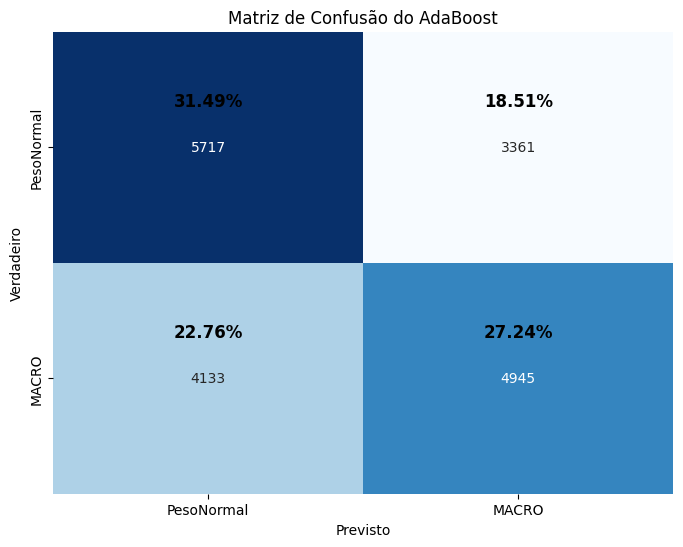

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Inicializar e treinar o classificador AdaBoost
adaboost_clf = AdaBoostClassifier(random_state=42)
adaboost_clf.fit(X_treino, y_treino)

# Prever os rótulos para os dados de teste
y_pred_adaboost = adaboost_clf.predict(X_teste)

# Calcular métricas de avaliação do conjunto de teste
accuracy_adaboost = accuracy_score(y_teste, y_pred_adaboost)
conf_matrix_adaboost = confusion_matrix(y_teste, y_pred_adaboost)
tn_adaboost, fp_adaboost, fn_adaboost, tp_adaboost = conf_matrix_adaboost.ravel()

# Calcular a especificidade usando os valores da matriz de confusão
especificidade = calcular_especificidade(tn_adaboost, fp_adaboost)
print("Especificidade:", especificidade)

# Exibir relatório de classificação do conjunto de teste para AdaBoost
print("\nRelatório de Classificação do Conjunto de Teste para AdaBoost:")
print(classification_report(y_teste, y_pred_adaboost, digits=4))

# Plotar a matriz de confusão do conjunto de teste para AdaBoost
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_adaboost, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['PesoNormal', 'MACRO'], yticklabels=['PesoNormal', 'MACRO'])

# Adicionando as porcentagens abaixo dos valores
for i in range(conf_matrix_adaboost.shape[0]):
    for j in range(conf_matrix_adaboost.shape[1]):
        plt.text(j+0.5, i+0.3, "{:.2f}%".format(conf_matrix_adaboost[i, j] / np.sum(conf_matrix_adaboost) * 100),
                     ha='center', va='center', color='black', fontsize=12, fontweight='bold')

plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão do AdaBoost')
plt.show()

In [ ]:
parametros = {'n_estimators': [50, 100, 150, 200, 250],
              'random_state': [None, 5, 50, 100],
              'learning_rate': [0.001, 0.01, 0.1, 1.0],
              'algorithm': ['SAMME', 'SAMME.R']}

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(adaboost_clf, parametros, cv=5, scoring='accuracy')

grid_search.fit(X_teste, y_pred_adaboost)

print("Melhores hiperparâmetros encontrados:")
print(grid_search.best_params_)
print("Melhor score de validação cruzada:")
print(grid_search.best_score_)

melhor_modelo = grid_search.best_estimator_

Melhores hiperparâmetros encontrados:
{'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 250, 'random_state': None}
Melhor score de validação cruzada:
0.9977968260342596


In [ ]:
grid_search.cv_results_

{'mean_fit_time': array([0.33746848, 0.3395874 , 0.4284204 , 0.49006448, 0.68667002,
        0.65347562, 0.65674329, 0.9345562 , 0.96082516, 1.00037799,
        1.23720603, 0.98488369, 1.59128351, 1.30962901, 1.63846445,
        1.30481095, 1.83392797, 1.7914495 , 1.6375246 , 1.84678326,
        0.31304479, 0.31138768, 0.31354575, 0.31736426, 0.88679199,
        0.67750216, 0.61649375, 0.6277257 , 1.23531718, 0.94000659,
        1.02777705, 1.15042176, 1.23808208, 1.52689362, 1.23704076,
        1.57755547, 1.64598403, 1.76278906, 1.84946413, 1.5764555 ,
        0.40410895, 0.47316613, 0.31795058, 0.31315875, 0.62002935,
        0.62928915, 0.92411537, 0.62966294, 0.94594998, 1.22083135,
        0.91055236, 0.91720152, 1.48510737, 1.21740394, 1.51392903,
        1.21307902, 1.81300921, 1.80205545, 1.5477582 , 1.78882089,
        0.3055625 , 0.3068903 , 0.3026032 , 0.30291052, 0.82661123,
        0.6759553 , 0.60335417, 0.59987717, 1.20640321, 0.90606265,
        0.91798115, 1.20312934,

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Defina os melhores parâmetros obtidos pelo GridSearch
best_params_ab = {'algorithm': 'SAMME.R',
                  'learning_rate': 1.0,
                  'n_estimators': 250,
                  'random_state': None}

# Inicialize o AdaBoostClassifier com os melhores parâmetros
best_ab_model = AdaBoostClassifier(**best_params_ab)

# Treine o modelo com os melhores parâmetros
best_ab_model.fit(X_treino, y_treino)

AdaBoostClassifier(n_estimators=250)

Acurácia do modelo AdaBoost com GridSearch: 0.5825071601674378
              precision    recall  f1-score   support

         0.0     0.5681    0.6880    0.6224      9078
         1.0     0.6046    0.4770    0.5333      9078

    accuracy                         0.5825     18156
   macro avg     0.5864    0.5825    0.5778     18156
weighted avg     0.5864    0.5825    0.5778     18156



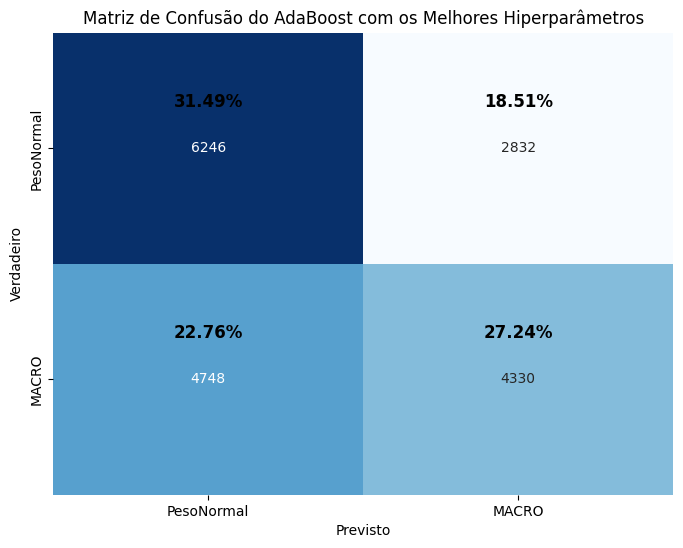

Especificidade do AdaBoost: 0.6880370125578321


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Obter a acurácia do modelo AdaBoost
accuracy_ab = best_ab_model.score(X_teste, y_teste)
print("Acurácia do modelo AdaBoost com GridSearch:", accuracy_ab)

# Fazer previsões no conjunto de teste
y_pred = best_ab_model.predict(X_teste)

# Imprimir o relatório de classificação
print(classification_report(y_teste, y_pred, digits=4))

# Função para plotar matriz de confusão
def plot_confusion_matrix(model, X, y):
    # Faça previsões
    y_pred = model.predict(X)
    # Crie a matriz de confusão
    cm = confusion_matrix(y, y_pred)
    # Plot
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['PesoNormal', 'MACRO'], yticklabels=['PesoNormal', 'MACRO'])
    # Adicionando as porcentagens abaixo dos valores
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j+0.5, i+0.3, "{:.2f}%".format(conf_matrix_adaboost[i, j] / np.sum(conf_matrix_adaboost) * 100),
                     ha='center', va='center', color='black', fontsize=12, fontweight='bold')
    plt.xlabel('Previsto')
    plt.ylabel('Verdadeiro')
    plt.title('Matriz de Confusão do AdaBoost com os Melhores Hiperparâmetros')
    plt.show()

# Plotar matriz de confusão para AdaBoost
plot_confusion_matrix(best_ab_model, X_teste, y_teste)

# Função para calcular a especificidade
def calcular_especificidade(verdadeiros_negativos, falsos_positivos):
    if verdadeiros_negativos + falsos_positivos == 0:
        return 0  # Evita divisão por zero
    especificidade = verdadeiros_negativos / (verdadeiros_negativos + falsos_positivos)
    return especificidade

# Calcular a matriz de confusão para os dados de teste
conf_matrix_ab = confusion_matrix(y_teste, y_pred)
tn_ab, fp_ab, fn_ab, tp_ab = conf_matrix_ab.ravel()

# Calcular a especificidade usando os valores da matriz de confusão do AdaBoost
especificidade_ab = calcular_especificidade(tn_ab, fp_ab)
print("Especificidade do AdaBoost:", especificidade_ab)
